In [12]:
import os
import math
import tensorflow
import numpy as np
import h5py
import  matplotlib.pyplot as plt
import VGG16, RESNET50

from tensorflow.keras.preprocessing import image
from scipy import spatial

In [13]:
# import kagglehub
# path = kagglehub.dataset_download("fatihkgg/ecommerce-product-images-18k")
# print("Path to dataset files:", path)

In [14]:
DATA_PATH="./datasets/ELECTRONIC_dataset"

In [29]:
def save_features(file_path, features, features_name):
    if os.path.exists(file_path):
      os.remove(file_path)  
    file=h5py.File(file_path, "w")
    file.create_dataset("features", data=features)
    file.create_dataset("features_name", data=np.string_(features_name))
    file.close()
        
def load_features(file_path):
    file=h5py.File(file_path, "r")
    features=file["features"][:]
    features_name=file["features_name"][:]
    features_name=features_name.astype(str).tolist()
    file.close()
    return features, features_name

def extract_features_from_dataset(model, FILE_PATH):
    features, features_name=[], []
    for i in os.listdir(FILE_PATH):
        img_path=FILE_PATH + "/" + i
        # print(img_path)
        features.append(model.extract_features(img_path))
        features_name.append(i)
    features=np.array(features)    
    return features, features_name

def check_similarities(search_img_feature, features_data):
    similar_images=[]
    for i in range(features_data.shape[0]):
        similar_image=1-spatial.distance.cosine(search_img_feature, features_data[i])
        similar_images.append(similar_image)
    similar_images=np.array(similar_images)
    return similar_images

def show_search_images(n, saved_feature_names, images_similarities_rank, images_similarites_value, folder_image_path):
    try: 
        plt.figure(figsize=(12, 9))
        for h, i in enumerate(images_similarities_rank[0:]):
            img_path = folder_image_path + "/" + saved_feature_names[i]
            # print(img_path)
            plt.subplot(4, 5, h + 1)
            img = image.load_img(img_path)
            plt.imshow(img, cmap="gray")
            plt.xlabel(f"{images_similarites_value[h]}")
            plt.xticks([])
            plt.yticks([])
        plt.show()
    except Exception:
        return True

def search_image(search_img_path, model, features_data, name_data, folder_image_path):
    search_img_feature=model.extract_features(search_img_path)
    similar_images=check_similarities(search_img_feature, features_data)
    images_similarities_rank=np.argsort(similar_images)[::-1]
    images_similarites_value=similar_images[images_similarities_rank]
    show_search_images(3, name_data, images_similarities_rank, images_similarites_value, folder_image_path)

# VGG16

In [16]:
SAVED_FEATURES_PATH='./saved_features_VGG16'

In [17]:
model_vgg16=tensorflow.keras.applications.vgg16.VGG16(
    weights="imagenet",
    input_shape=((224,224,3)),
    pooling="max",
    include_top=False
)
# model_vgg16.summary()

In [18]:
vgg16=VGG16.VGGnet()

1/1 [==============================] - 0s 248ms/step


In [19]:
vgg16_features, vgg16_features_name=extract_features_from_dataset(vgg16, DATA_PATH)
if not os.path.exists(SAVED_FEATURES_PATH):
    save_features(SAVED_FEATURES_PATH, vgg16_features, vgg16_features_name)

1/1 [==============================] - 0s 206ms/step


In [20]:
vgg16_features_data, vgg16_name_data=load_features(SAVED_FEATURES_PATH)

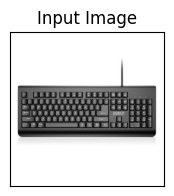

1/1 [==============================] - 0s 125ms/step


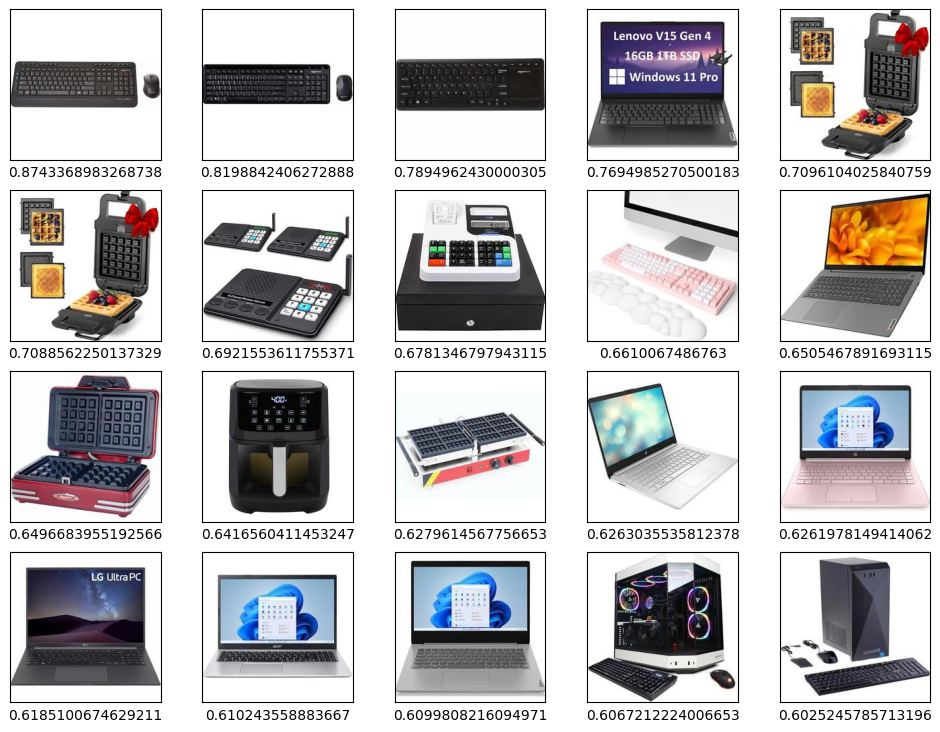

In [ ]:
INPUT_PATH="./Robot-RK20.png"
plt.figure(figsize=(2,2))
plt.title("Input Image")
plt.imshow(image.load_img(INPUT_PATH), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()
search_image(INPUT_PATH, vgg16, vgg16_features_data, vgg16_name_data, DATA_PATH)

# RESNET50

In [34]:
SAVED_FEATURES_PATH='saved_features_RESNET50'

In [35]:
model_resnet50=tensorflow.keras.applications.resnet50.ResNet50(
    weights="imagenet",
    input_shape=((224,224,3)),
    pooling="max",
    include_top=True
)
model=tensorflow.keras.models.Model(model_resnet50.input, model_resnet50.get_layer('avg_pool').output)
# model.summary()

102967424/102967424 [==============================] - 47s 0us/step


In [36]:
resnet50=RESNET50.RESNET50()

In [37]:
resnet50_features, resnet50_name_data=extract_features_from_dataset(resnet50, DATA_PATH)
if not os.path.exists(SAVED_FEATURES_PATH):
    save_features(SAVED_FEATURES_PATH, resnet50_features, resnet50_name_data)


1/1 [==============================] - 0s 252ms/step


In [39]:
resnet50_features_data, resnet50_name_data=load_features(SAVED_FEATURES_PATH)

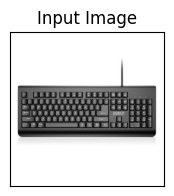

1/1 [==============================] - 0s 159ms/step


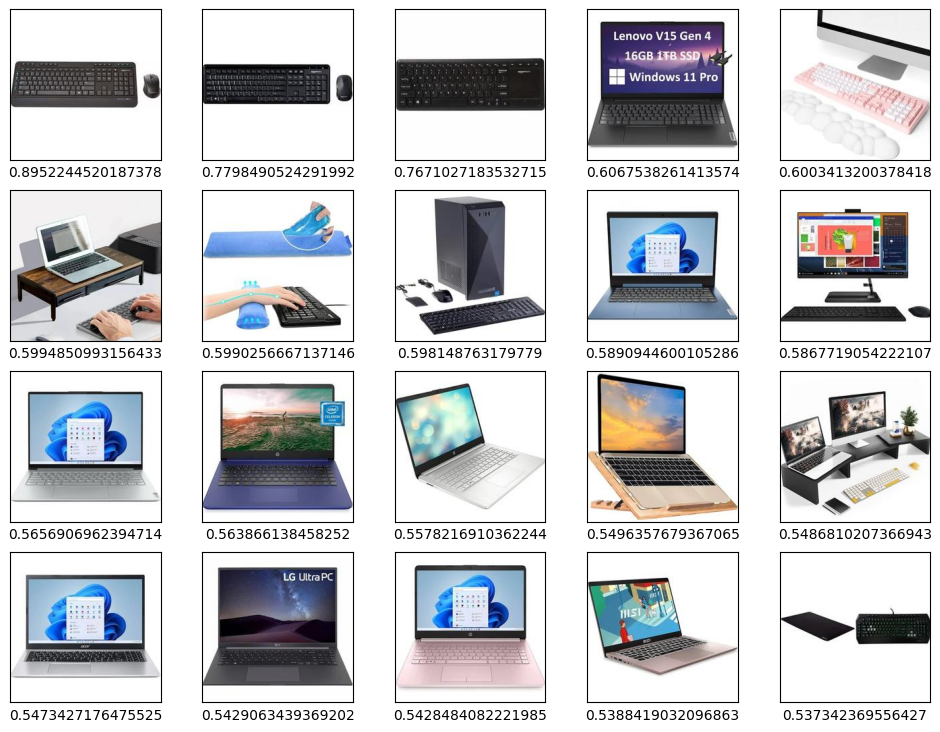

In [ ]:
INPUT_PATH="./Robot-RK20.png"
plt.figure(figsize=(2,2))
plt.title("Input Image")
plt.imshow(image.load_img(INPUT_PATH), cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()
search_image(INPUT_PATH, resnet50, resnet50_features_data, resnet50_name_data, DATA_PATH)